In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from windHelper import WindHelper
from factorModel.factorValidator import *
from datetime import *

In [2]:
beginDate = datetime(2006, 1, 1)
endDate = datetime(2017, 8, 22)
para = "close"
df = WindHelper.getMultiTimeSeriesDataFrame(codeList=["0602E.CS","CRBSA.RB"], beginDate=beginDate, endDate=endDate, para=para)
df = df.dropna()
df.head()

Welcome to use Wind Quant API for Python (WindPy)!
You can use w.menu to help yourself to create commands(WSD,WSS,WST,WSI,WSQ,...)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


0602e.cs_close  crbsa.rb_close
trade_date                                
2006-01-04        101.9453          307.15
2006-01-05        101.1135          307.15
2006-01-06        102.2258          307.01
2006-01-09        102.0874          306.94
2006-01-10        102.1350          307.42

# 观察7-10年国开净价和CRB的关系

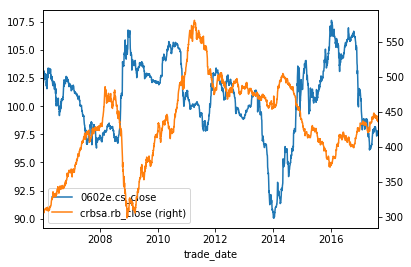

In [3]:
%matplotlib inline
df.plot(secondary_y='crbsa.rb_close')

In [4]:
import pandas_highcharts
from pandas_highcharts.display import display_charts
import matplotlib.pyplot as plt
display_charts(df, chart_type="stock",secondary_y='crbsa.rb_close', title="CRB测试")

# 夏普比率校验

In [5]:
asset_series = df["0602e.cs_close"]
factor_series = df["crbsa.rb_close"]

In [26]:
config = {"relation": NEGATIVE, "type":"up", "his_count": 20,"std_count":1, "period": 5}

In [27]:
report = sharp_ratio_test(asset_series=asset_series, 
                             factor_series=factor_series, 
                             event_name="e001", 
                             config=config)

In [28]:
import pandas_highcharts
from pandas_highcharts.display import display_charts
import matplotlib.pyplot as plt
print report['excess_sp']
display_charts(report["ts"][["base","value"]], chart_type="stock", title="CRB 夏普比率测试")

0.239843740247


# 信号PAE校验

重新检视配置文件

In [41]:
config = {"relation": POSTIVE, "type":"up", "his_count": 30,"std_count":2, "period": 5}

In [42]:
report = perform_after_event(asset_series=asset_series, 
                             factor_series=factor_series, 
                             event_name="e001", 
                             config=config,
                             asset_price=True)

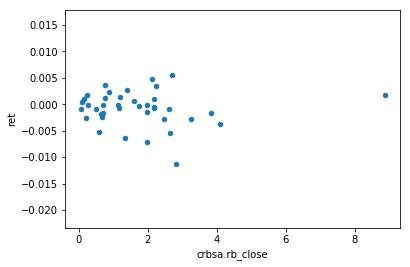

In [43]:
%matplotlib inline
report["ts"].plot(kind="scatter",x="crbsa.rb_close", y="ret")

In [22]:
len(report["ts"]["ret"][report["ts"]["ret"]<0])*1.0/len(report["ts"]["ret"])

0.5728155339805825